## Convolutional Neural Networks - Implementation
Your goal in this project is to classify handwritten digits using Convolutional Neural Networks. Here are a few examples of images from the input data:

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

As output labels, we have a set of integer values ranging from 0 to 9. We are going to follow those steps in this notebook:

1. **Prepare the input data**
2. **Creating a simple fully connected model**
3. **Extending to CNNs**
4. **Visualizing Predictions**

As a summary, three new classes/modules are going to be used:
- [`keras.layers.Flatten`](https://keras.io/layers/core/)
    - Flattens the input. Does not affect the batch size.
- [`keras.layers.Conv2D`](https://keras.io/layers/convolutional/)
    - 2D convolution layer
- [`keras.layers.MaxPooling2D`](https://keras.io/layers/pooling/)
    - Max pooling operation for spatial data.


### 1. Preparing the input data

In [1]:
import warnings
warnings.filterwarnings("ignore")

from keras.datasets import mnist

# The data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [4]:
print("Shape of the training set: {}".format(X_train.shape))
print("Shape of the test set: {}".format(X_test.shape))

Shape of the training set: (60000, 28, 28)
Shape of the test set: (10000, 28, 28)


In [2]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [3]:
y_train[1]

0

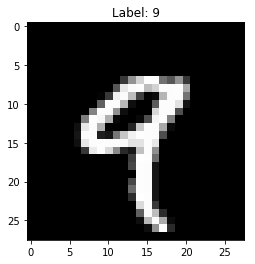

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Index to be visualized
IDX=4
plt.imshow(X_train[IDX], cmap='gray')
plt.title("Label: {}".format(y_train[IDX]))
plt.show()

Now, let's normalize the data using standardization:

In [7]:
train_mean = X_train.mean(); train_mean

33.318421449829934

In [8]:
train_std = X_train.std();train_std

78.56748998339798

In [9]:
X_train = (X_train - train_mean)/train_std
X_test = (X_test - train_mean)/train_std

In [10]:
print(f'Training Mean {X_train.mean():.3f}')
print(f'Training Std {X_train.std():.3f}')
print(f'Test Mean {X_test.mean():.3f}')
print(f'Test Std {X_test.std():.3f}')

Training Mean -0.000
Training Std 1.000
Test Mean 0.006
Test Std 1.008


Normalisation is required so that all the inputs are at a comparable range.
Say there are two inputs to your ann, x1 and x2. x1 varies from to 0 to 0.5 and x2 varies from 0 to 1000. A change of x1 of 0.5  is 100 percent change where as a change of x2 by 0.5 is only a change of 0.05%. Hence normalization helps. 

### 2. Training using only Fully Connected layers first

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

model = Sequential([
        Flatten(), 
        Dense(400, activation='relu'),
        Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2)
score = model.evaluate(X_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
60000/60000 [==============================] - 24s 404us/step - loss: 0.1910 - acc: 0.9414
Epoch 2/2
10000/10000 [==============================] - 1s 123us/step
Test loss: 0.0889566838736646
Test accuracy: 0.9727


In [11]:
(28*28+10)//2

397

### 3. Extending to CNNs

Now, let's replicate the same architecture from the visualization provided on the previous video:
![Screen Shot 2019-05-14 at 12 58 15](https://user-images.githubusercontent.com/5733246/57713463-e8627400-7648-11e9-8c64-3745519dbb20.png)

The analog architecture that is going to be used is:
- Conv. Layer with 6 filters
- Maxpooling
- Conv. Layer with 16 filters
- Maxpooling
- Fully connected layer with 120 units
- Fully connected layer with 100 units
- Output layer with 10 units

#### 3.1 One Conv-Layer

In [14]:
from keras.layers import Conv2D

model = Sequential([
    Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2)
score = model.evaluate(X_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (60000, 28, 28)

The previous error occours because we need to add a new dimension to the input data. We can confirm this in the [documentation of Conv2D](https://keras.io/layers/convolutional/):
> 4D tensor with shape: (batch, rows, cols, channels) 


The current shape is:

In [15]:
print("Shape of the training set: {}".format(X_train.shape))
print("Shape of the test set: {}".format(X_test.shape))

Shape of the training set: (60000, 28, 28)
Shape of the test set: (10000, 28, 28)


It is missing the channel dimension. Since this image is black and white, the number of channels is just one. The input data can be reshaped in the folowing way:

In [16]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

Now let's train again:

In [17]:
from keras.layers import Conv2D

model = Sequential([
    Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2)
score = model.evaluate(X_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
60000/60000 [==============================] - 45s 747us/step - loss: 0.1864 - acc: 0.9444
Epoch 2/2
10000/10000 [==============================] - 3s 251us/step
Test loss: 0.07510231311074458
Test accuracy: 0.978


#### 3.2 One Conv-Layer + Maxpooling

Now, let's add maxpooling:

In [ ]:
from keras.layers import MaxPooling2D

model = Sequential([
    Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2)
score = model.evaluate(X_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

#### 3.3 Two Conv-Layer + Maxpooling

And now, let's finish the architecture:

In [19]:
from keras.layers import MaxPooling2D

model = Sequential([
    Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2)
score = model.evaluate(X_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
60000/60000 [==============================] - 36s 598us/step - loss: 0.1637 - acc: 0.9506
Epoch 2/2
10000/10000 [==============================] - 3s 292us/step
Test loss: 0.05425662614628673
Test accuracy: 0.9829


### 4. Visualizing predictions
Finally, let's visualize some predictions:

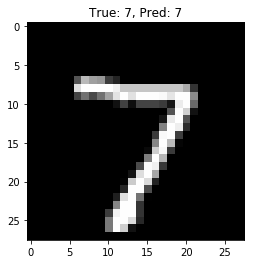

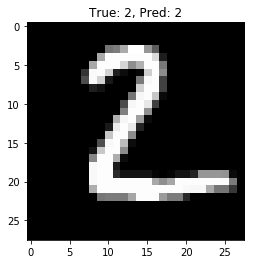

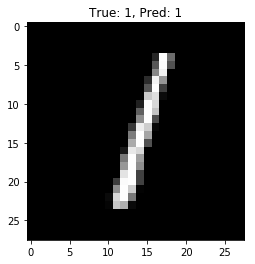

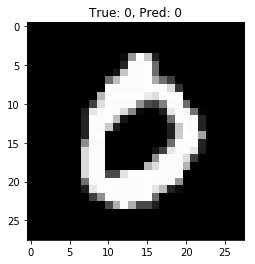

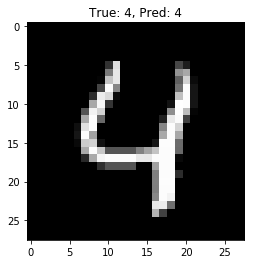

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Index to be visualized
for idx in range(5):
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    out = model.predict(X_test[idx].reshape(1,28,28,1))
    plt.title("True: {}, Pred: {}".format(y_test[idx], np.argmax(out)))
    plt.show()